# Gensim

- Gensim is a library popularly used for topic modelling, similarity retrieval and document indexing, more at https://pypi.org/project/gensim/
- pip install gensim

- Word2Vec is a technique for building word embeddings
- Glove is a 3rd party of the shelf word embedding which has been trained over huge text

In [1]:
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer

docs = ['well done','good word','great work','nice work','excellent!','weak','bad job','not good','poor work','could be better']

C:\MachineLearning\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
splitted_docs = []
def token_to_vector(docs):
    for doc in docs:
        splitted_docs.append(doc.lower().split())

token_to_vector(docs)
print (splitted_docs)

[['well', 'done'], ['good', 'word'], ['great', 'work'], ['nice', 'work'], ['excellent!'], ['weak'], ['bad', 'job'], ['not', 'good'], ['poor', 'work'], ['could', 'be', 'better']]


In [47]:
# train the word2vec model
model = Word2Vec(splitted_docs, size=100, min_count=1, workers=5) #size specifies the word embedding vector dimensions
print (model)
print (model.wv.vocab)

# save the model
model.save('basic_model.bin')

# load the model
loaded_model = Word2Vec.load('basic_model.bin')
print (loaded_model)

Word2Vec(vocab=16, size=100, alpha=0.025)
{'well': <gensim.models.keyedvectors.Vocab object at 0x0000029318A02400>, 'done': <gensim.models.keyedvectors.Vocab object at 0x0000029318A023C8>, 'good': <gensim.models.keyedvectors.Vocab object at 0x0000029318A027F0>, 'word': <gensim.models.keyedvectors.Vocab object at 0x0000029318A02390>, 'great': <gensim.models.keyedvectors.Vocab object at 0x0000029318A022E8>, 'work': <gensim.models.keyedvectors.Vocab object at 0x0000029318A022B0>, 'nice': <gensim.models.keyedvectors.Vocab object at 0x0000029318A02278>, 'excellent!': <gensim.models.keyedvectors.Vocab object at 0x0000029318A02358>, 'weak': <gensim.models.keyedvectors.Vocab object at 0x0000029318A02320>, 'bad': <gensim.models.keyedvectors.Vocab object at 0x0000029318A02828>, 'job': <gensim.models.keyedvectors.Vocab object at 0x0000029318A028D0>, 'not': <gensim.models.keyedvectors.Vocab object at 0x0000029318A02240>, 'poor': <gensim.models.keyedvectors.Vocab object at 0x0000029318A02198>, 'cou

C:\MachineLearning\anaconda\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


### Visualize embeddings using PCA

C:\MachineLearning\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


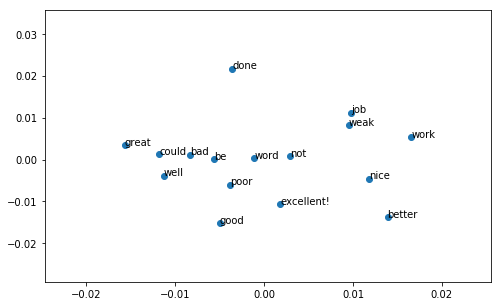

In [46]:
vocab = loaded_model.wv.vocab
words = []
for i, word in enumerate(vocab):
    words.append(word)

X = loaded_model[vocab]

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

z = PCA(n_components=2)
pca_model = z.fit(X)
components = pca_model.transform(X)
plt.figure(figsize=(8,5))
plt.scatter(components[:,0],components[:,1])

words = list(loaded_model.wv.vocab)
for i in range(0, components.shape[0]):
    plt.annotate(words[i], xy=(components[i,0],components[i,1]))

plt.show()

### Try some word operations on our custom word embedding

    - Key thing to note is that since we have created the word embedding on a very small text corpus of words, the embeddings won't be great in reflecting the actual relation between the workds. However this is an example for kicks sake so let's have some fun !!

In [42]:
# We see that bad and great are more closer to each other while bad and good are more away - let's see their similary score
print (loaded_model.n_similarity(['bad'],['great']))
print (loaded_model.n_similarity(['bad'],['good']))

0.07968407
-0.014731359


C:\MachineLearning\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  
C:\MachineLearning\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
# find more similar word
print (loaded_model.most_similar(positive=['excellent!'], negative=['nice']))

[('could', 0.15680688619613647), ('great', 0.14091020822525024), ('poor', 0.07740747183561325), ('not', 0.05991830304265022), ('good', 0.05777905881404877), ('well', 0.04970854893326759), ('word', 0.019229214638471603), ('better', 0.018020104616880417), ('weak', -0.002666950225830078), ('done', -0.02189803123474121)]


C:\MachineLearning\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
